In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
DATA_ROOT = "F:/DATAS/NEUCOUGHDATA_COUGH/"
sample_test = "20240927192134_audiodata.wav"

In [16]:
import pandas as pd

In [ ]:
wav_test_path = os.path.join(DATA_ROOT, sample_test)
y, sr = librosa.load(wav_test_path)
plt.figure(0)
plt.plot(range(len(y)), y)
# plt.close(0)

## 读取meta文件的一些列

In [7]:
def get_attributes(name_list, filename):
    # name_list = ["gender", "issmoking", "isalcohol", "iscough", "isfever", "isrespill", "iscovid19"]
    json_str = None  # json string
    with open(filename, 'r', encoding='utf_8') as fp:
        json_str = fp.read()
    json_data = json.loads(json_str)  # get json from json string
    res = []
    for name in name_list:
        res.append(json_data[name])
    return res

def get_answers(idx_list, filename):
    idxrange = [1, 9, 17, 24, 32, 40, 47, 54, 61]
    idxmapper = {}
    for i in range(len(idxrange)-1):
        for j in range(idxrange[i], idxrange[i+1]):
            idxmapper[j] = idxrange[i]
    json_str = None  # json string
    with open(filename, 'r', encoding='utf_8') as fp:
        json_str = fp.read()
    json_data = json.loads(json_str)  # get json from json string
    
    consti_mapper = {0:"pinghe", 1:"qixu", 2:"yangxu", 3:"yinxu", 4:"tanshi", 5:"shire", 6:"xueyu", 7:"qiyu", 8:"tebing"}
    idxrange = [1, 9, 17, 24, 32, 40, 47, 54, 61, 68]
    idx2st = {}
    idx2consti = {}
    for i in range(len(idxrange)-1):
        for j in range(idxrange[i], idxrange[i+1]):
            idx2st[j] = i
            idx2consti[j] = consti_mapper[i]
    # idxmapper
    # print(idx2st)
    res = []
    for idx in idx_list:
        step = idx - idxrange[idx2st[idx]]
        consti = idx2consti[idx]
        res.append(json_data[consti]["answer_list"][step])
    return res
print(get_attributes(["gender", "issmoking", "isalcohol", "iscough", "isfever", "isrespill", "iscovid19"], "F:/DATAS/NEUCOUGHDATA_COUGH/test_20240927184318_condition.json.json"))
print(get_answers([10,15,21,26,31,38,60,61,62,63,64], "F:/DATAS/NEUCOUGHDATA_COUGH/ctm_data_20240927184318ctmc.json.json"))  # 

['1', '0', '0', '0', '0', '3', '0']
[2, 3, 1, 4, 2, 5, 5, 4, 5, 4, 2]


## 读取文件名和对应meta文件的一些列保存为metainfo.csv

In [12]:
name_list = []
for item in os.listdir(DATA_ROOT):
    if item[-3:] == "wav":
        name_list.append(item[:14])
# print(len(name_list))

# for item in name_list:
    # print(item+"_audiodata.wav", "ctm_data_"+item+"ctmc.json.json", "test_"+item+"_condition.json.json")
fout = open(DATA_ROOT+"metainfo.csv", 'w')
fout.write("fileid,gender,issmoking,isalcohol,iscough,isfever,isrespill,iscovid19,q10,q15,q21,q26,q31,q38,q60,q61,q62,q63,q64\n")
# idx = 0
for item in name_list:
    fout.write(item+",")
    # print(item+",")
    attris = get_attributes(["gender", "issmoking", "isalcohol", "iscough", "isfever", "isrespill", "iscovid19"], "F:/DATAS/NEUCOUGHDATA_COUGH/test_{}_condition.json.json".format(item))
    # print(",".join(attris)+",")
    fout.write(",".join(attris)+",")
    answers = get_answers([10,15,21,26,31,38,60,61,62,63,64], "F:/DATAS/NEUCOUGHDATA_COUGH/ctm_data_{}ctmc.json.json".format(item))
    # print(",".join(attris)+"\n")
    fout.write(",".join([str(ans) for ans in answers])+"\n")
    # idx += 1
    # if idx>4:
    #     break
fout.close()
print("metainfo has saved!")

metainfo has saved!


## 观察不同列的标签分布

In [17]:
annotated_df = pd.read_csv(DATA_ROOT+"metainfo.csv", delimiter=',', header=0, index_col=None)
annotated_df

,fileid,gender,issmoking,isalcohol,iscough,isfever,isrespill,iscovid19,q10,q15,q21,q26,q31,q38,q60,q61,q62,q63,q64
0,20240921104740,1,0,0,1,0,3,0,1,2,2,3,3,1,2,2,1,3,4
1,20240921125652,0,0,0,0,0,0,0,1,1,1,3,1,1,1,2,3,2,1
2,20240921130720,0,0,0,0,0,0,0,1,3,1,2,1,5,4,2,2,3,1
3,20240921133332,0,0,0,0,0,3,0,3,1,1,2,3,3,2,3,4,3,1
4,20240921134517,0,0,0,0,0,0,0,3,2,2,3,2,4,2,4,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,20241008172507,1,0,1,0,0,3,0,2,2,2,4,3,4,2,4,4,2,4
101,20241008174109,0,0,0,0,0,0,0,2,1,2,3,4,2,1,1,1,1,1
102,20241008180138,1,0,0,0,0,0,1,2,3,5,3,3,2,3,2,3,1,1
103,20241008201738,1,0,0,0,0,0,0,1,1,1,1,1,1,1,2,1,1,1


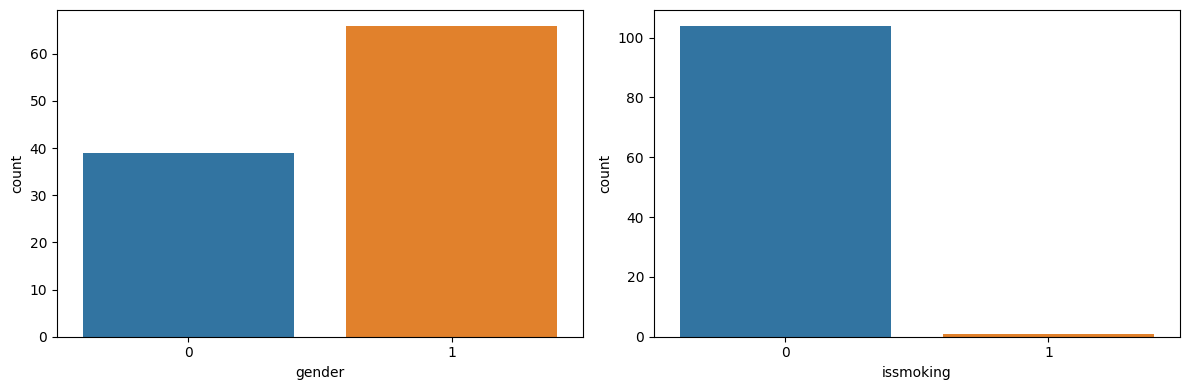

In [31]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="gender", ax=axs[0])
sns.countplot(data=annotated_df, x="issmoking", ax=axs[1])
f.tight_layout()

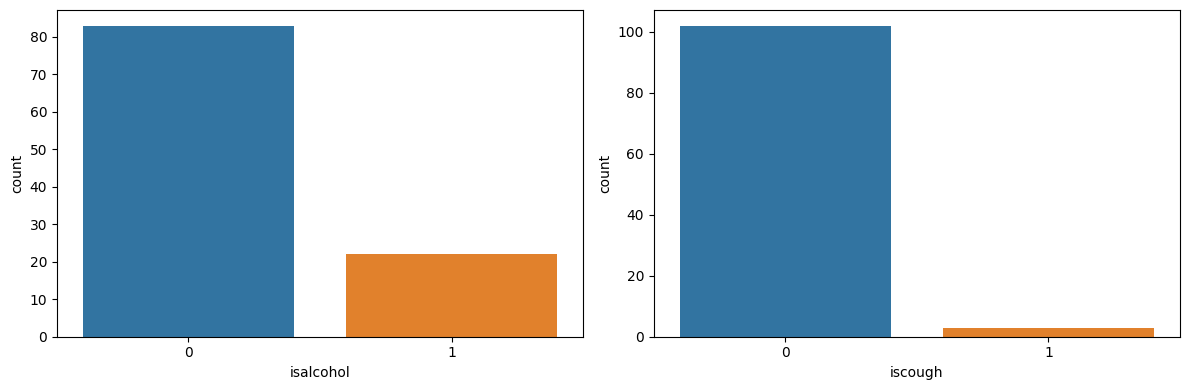

In [33]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="isalcohol", ax=axs[0])
sns.countplot(data=annotated_df, x="iscough", ax=axs[1])
f.tight_layout()

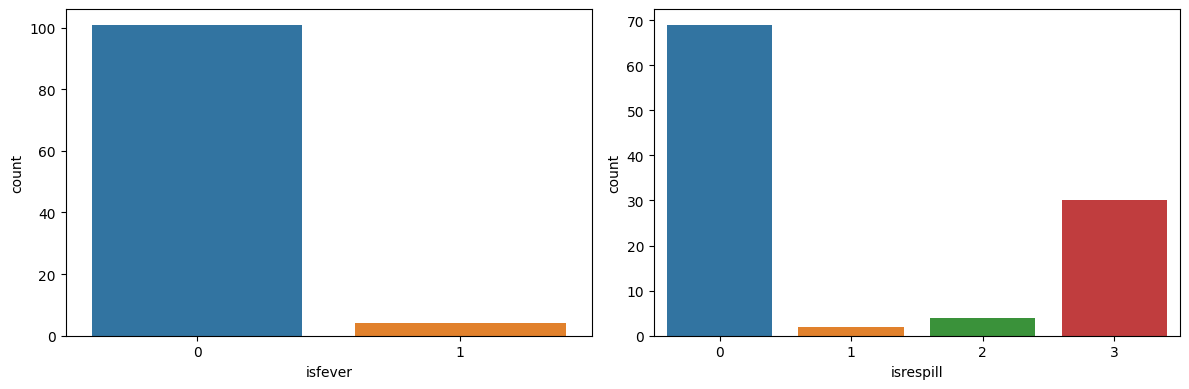

In [34]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="isfever", ax=axs[0])
sns.countplot(data=annotated_df, x="isrespill", ax=axs[1])
f.tight_layout()

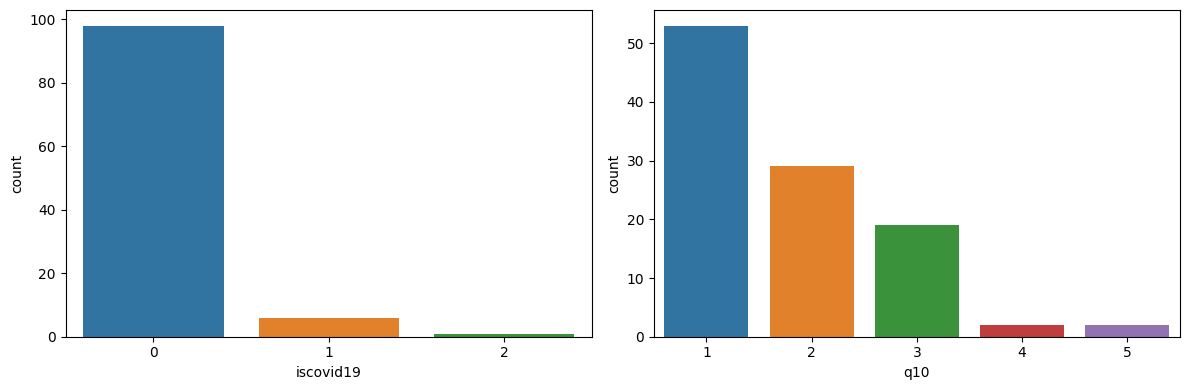

In [36]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="iscovid19", ax=axs[0])
sns.countplot(data=annotated_df, x="q10", ax=axs[1])
f.tight_layout()

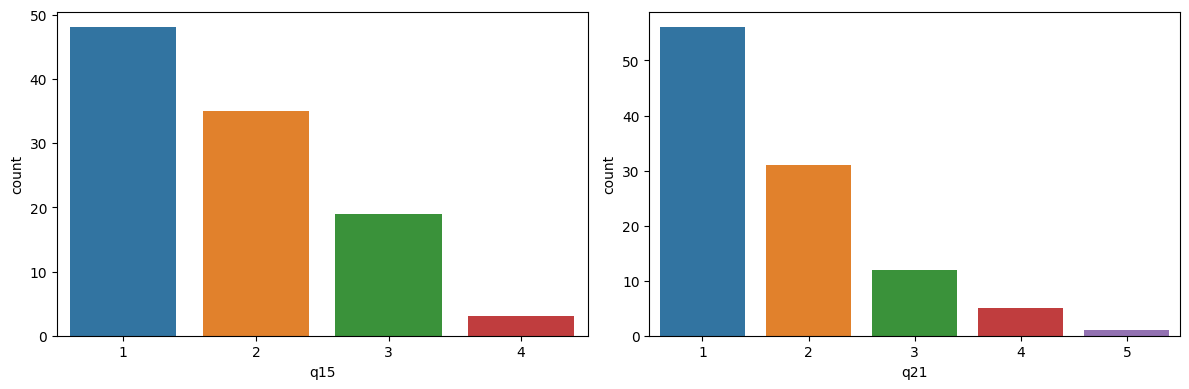

In [37]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="q15", ax=axs[0])
sns.countplot(data=annotated_df, x="q21", ax=axs[1])
f.tight_layout()

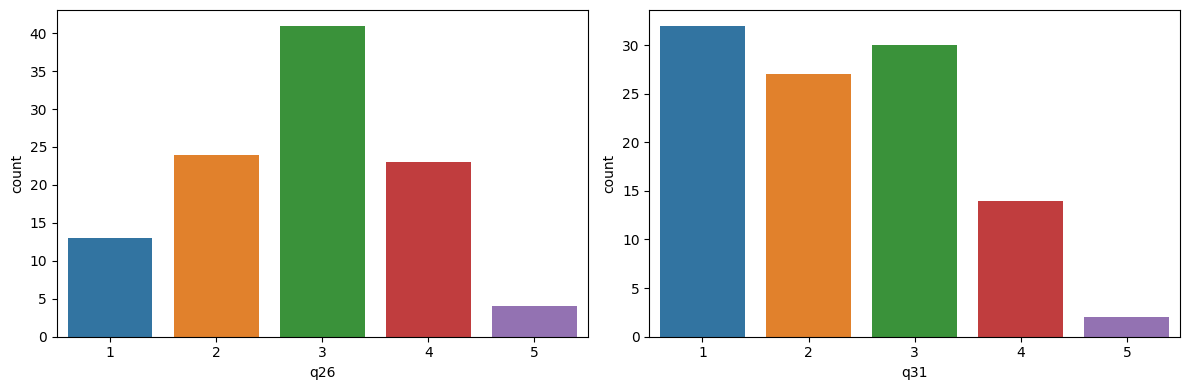

In [38]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="q26", ax=axs[0])
sns.countplot(data=annotated_df, x="q31", ax=axs[1])
f.tight_layout()

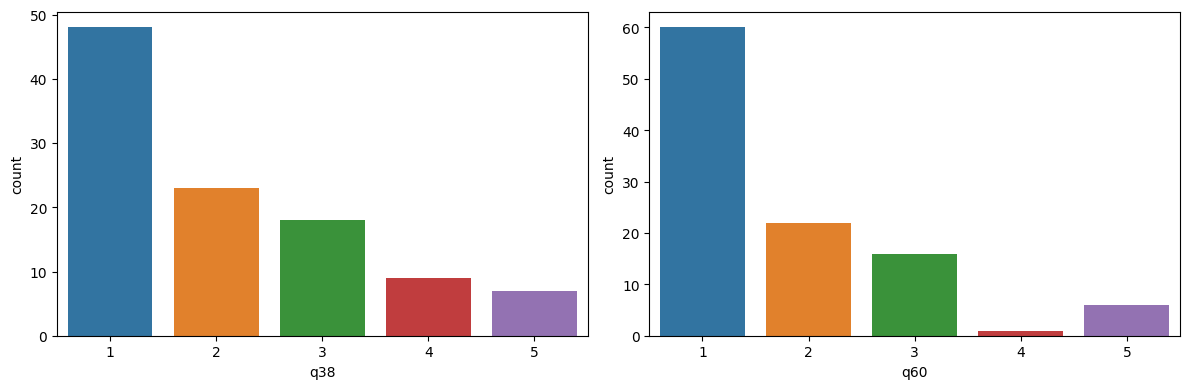

In [41]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="q38", ax=axs[0])
sns.countplot(data=annotated_df, x="q60", ax=axs[1])
f.tight_layout()

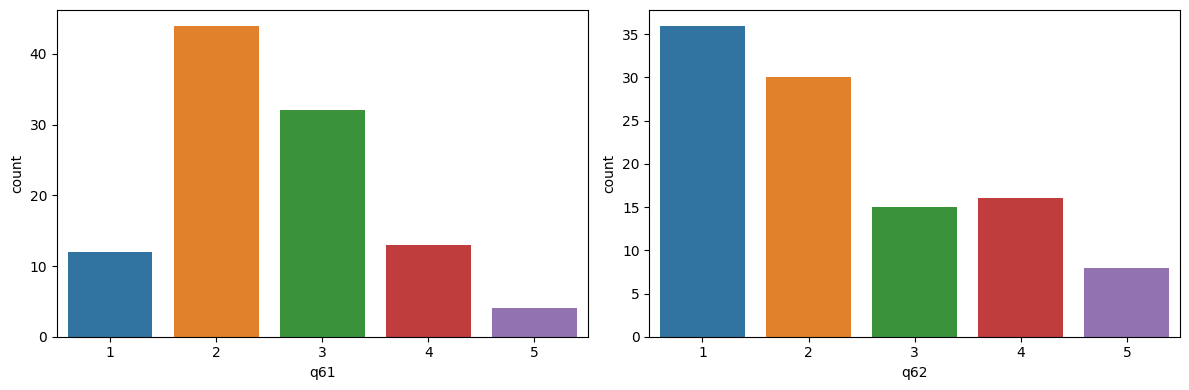

In [40]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="q61", ax=axs[0])
sns.countplot(data=annotated_df, x="q62", ax=axs[1])
f.tight_layout()

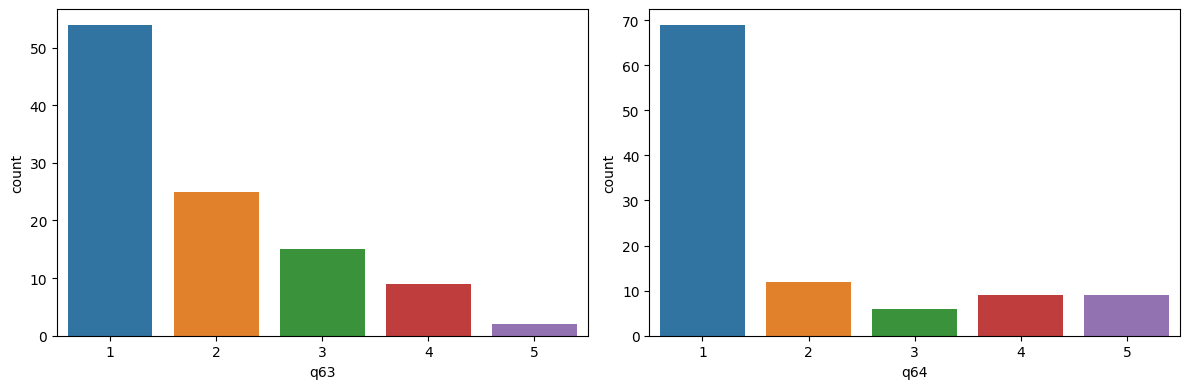

In [39]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annotated_df, x="q63", ax=axs[0])
sns.countplot(data=annotated_df, x="q64", ax=axs[1])
f.tight_layout()

# 选取比较均衡的类别：性别、疾病、所有问题